#RandomForestClassifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
breast = pd.read_csv('/content/drive/MyDrive/datasets/breast-cancer.csv')

breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features =['area_mean', 'texture_mean']
x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(398, 2) (171, 2) (398,) (171,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 : {}%'.format(round(clf.score(x_test, y_test), 3))) # accuracy_score(y_test, pred)

정확도 : 0.895%


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

cm = confusion_matrix(y_test, pred)
ps = precision_score(y_test, pred)
acc = accuracy_score(y_test, pred)
rc = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(cm)
print()
print('정확도 : {}%'.format(round(acc*100, 2)))
print('정밀도 : {}%'.format(round(ps*100, 2)))
print('재현율 : {}%'.format(round(rc*100)))
print('f1_score : {}%'.format(round(f1 *100, 2)))

[[102   5]
 [ 13  51]]

정확도 : 89.47%
정밀도 : 91.07%
재현율 : 80%
f1_score : 85.0%


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.91      0.80      0.85        64

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.88       171
weighted avg       0.90      0.89      0.89       171



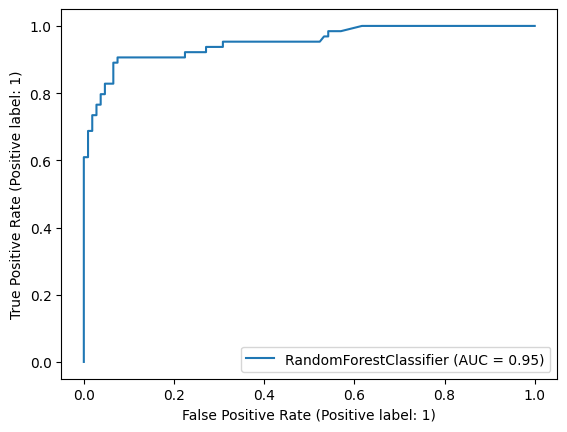

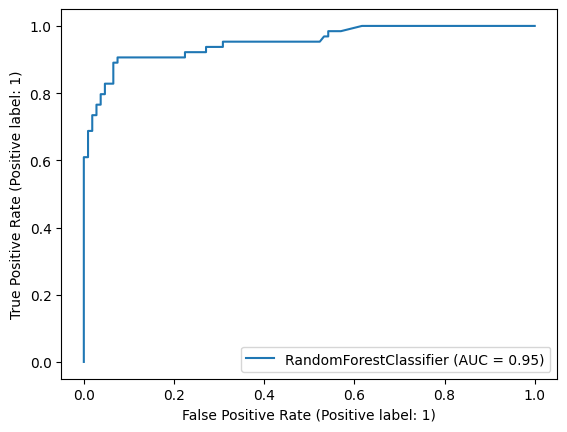

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
roc_disp.plot()
plt.show()

In [ ]:
importances = clf.feature_importances_
columns_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([columns_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.688805
1  texture_mean     0.311195


<BarContainer object of 2 artists>

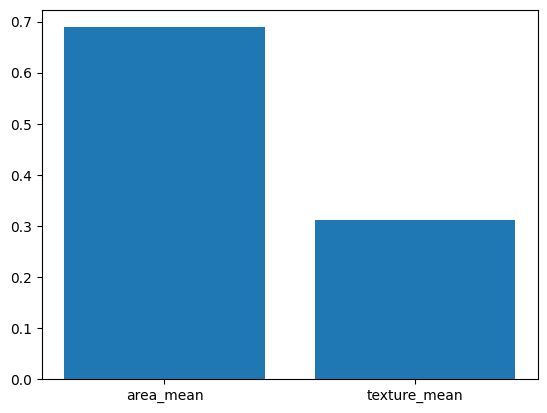

In [ ]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)